# Read in data

In [33]:
import pandas as pd
original_path = 'C:/Users/skaro/Documents/University/MPhys/MPhys Coding/original_data.csv'
original = pd.read_csv(original_path, on_bad_lines='skip', header=None, sep='[;,]', engine='python')
del original[35]
dict = {0:'event_ID', 1:'process_ID', 2:'event_weight', 3:'MET', 4:'METphi',
       5:'obj1', 6:'E1', 7:'pt1', 8:'eta1', 9:'phi1',
       10:'obj2', 11:'E2', 12:'pt2', 13:'eta2', 14:'phi2',
       15:'obj3', 16:'E3', 17:'pt3', 18:'eta3', 19:'phi3',
       20:'obj4', 21:'E4', 22:'pt4', 23:'eta4', 24:'phi4',
       25:'obj5', 26:'E5', 27:'pt5', 28:'eta5', 29:'phi5',
       30:'obj6', 31:'E6', 32:'pt6', 33:'eta6', 34:'phi6'}
original.rename(columns=dict, inplace=True)
original = original.astype({
    'E1':float, 'pt1':float, 'eta1':float, 'phi1':float,
    'E2':float, 'pt2':float, 'eta2':float, 'phi2':float,
    'E3':float, 'pt3':float, 'eta3':float, 'phi3':float,
    'E4':float, 'pt4':float, 'eta4':float, 'phi4':float,
    'E5':float, 'pt5':float, 'eta5':float, 'phi5':float,
    'E6':float, 'pt6':float, 'eta6':float, 'phi6':float})
original

,event_ID,process_ID,event_weight,MET,METphi,obj1,E1,pt1,eta1,phi1,...,obj5,E5,pt5,eta5,phi5,obj6,E6,pt6,eta6,phi6
0,354,monojet_Zp2000.0_DM_50.0,0.000024,832841.0,-1.224310,b,947383.0,824498.0,-0.523103,1.644210,...,j,39507.6,35365.1,0.47046,-1.16445,j,225430.0,26878.2,-2.81608,-2.25938
1,354,monojet_Zp2000.0_DM_50.0,0.000024,732115.0,1.172450,j,1069460.0,751597.0,0.858186,-1.842170,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,354,monojet_Zp2000.0_DM_50.0,0.000024,1056280.0,-3.067440,j,676000.0,640429.0,0.330450,0.704554,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,354,monojet_Zp2000.0_DM_50.0,0.000024,631781.0,1.641810,j,936707.0,616229.0,0.973383,-1.565920,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,354,monojet_Zp2000.0_DM_50.0,0.000024,457316.0,-1.875360,j,640313.0,589524.0,0.390749,1.237340,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,354,monojet_Zp2000.0_DM_50.0,0.000024,887847.0,0.226765,j,955187.0,889283.0,-0.381788,-2.868670,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
6140,354,monojet_Zp2000.0_DM_50.0,0.000024,914355.0,1.529030,j,1119940.0,1012690.0,0.453265,-1.772780,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
6141,354,monojet_Zp2000.0_DM_50.0,0.000024,782256.0,-1.207510,j,1915090.0,874869.0,1.418550,1.839270,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
6142,354,monojet_Zp2000.0_DM_50.0,0.000024,632390.0,-0.975687,j,731849.0,722541.0,-0.134499,2.563930,...,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


# Separate data into training and validation sets

Use DataFrame.sample() and DataFrame.drop() from pandas

In [5]:
validation = original.sample(frac=0.2)
training = original.drop(validation.index)

# Display training data as graphs

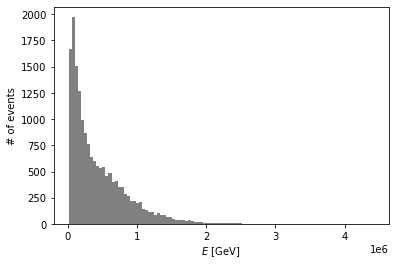

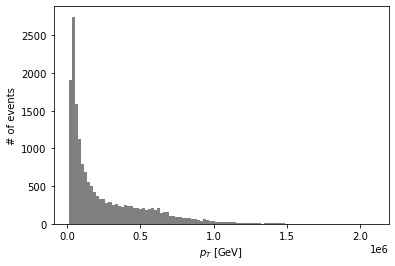

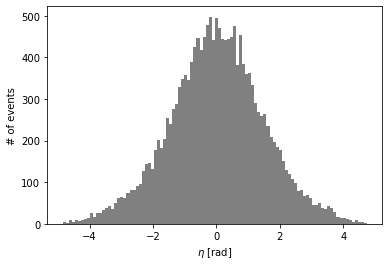

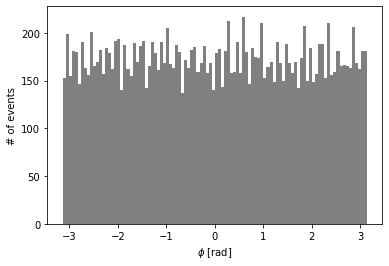

In [6]:
import matplotlib.pyplot as plt
E = pd.concat([training['E1'], training['E2'], training['E3'], training['E4'], training['E5'], training['E6']])
pt = pd.concat([training['pt1'], training['pt2'], training['pt3'], training['pt4'], training['pt5'], training['pt6']])
eta = pd.concat([training['eta1'], training['eta2'], training['eta3'], training['eta4'], training['eta5'], training['eta6']])
phi = pd.concat([training['phi1'], training['phi2'], training['phi3'], training['phi4'], training['phi5'], training['phi6']])

values = [E, pt, eta, phi]
vars_names = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']
units = ['[GeV]', '[GeV]', '[rad]', '[rad]']
n_bins = 100

for i in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(values[i], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=vars_names[i] + ' ' + units[i])
    plt.ylabel('# of events')
    plt.show()

# Setting up the network
## Preparing the data

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from fastai import learner
from fastai.data import core

training_x = training[['E1', 'pt1', 'eta1', 'phi1',
                      'E2', 'pt2', 'eta2', 'phi2',
                      'E3', 'pt3', 'eta3', 'phi3',
                      'E4', 'pt4', 'eta4', 'phi4',
                      'E5', 'pt5', 'eta5', 'phi5',
                      'E6', 'pt6', 'eta6', 'phi6']]
validation_x = validation[['E1', 'pt1', 'eta1', 'phi1',
                      'E2', 'pt2', 'eta2', 'phi2',
                      'E3', 'pt3', 'eta3', 'phi3',
                      'E4', 'pt4', 'eta4', 'phi4',
                      'E5', 'pt5', 'eta5', 'phi5',
                      'E6', 'pt6', 'eta6', 'phi6']]
training_y = training_x
validation_y = validation_x

training_ds = TensorDataset(torch.tensor(training_x.values, dtype=torch.float), torch.tensor(training_y.values, dtype=torch.float))
validation_ds = TensorDataset(torch.tensor(validation_x.values, dtype=torch.float), torch.tensor(validation_y.values, dtype=torch.float))



Using batch size optimised by previous students

In [64]:
bs = 256
# Converts the TensorDataset into a DataLoader object and combines into one DataLoaders object (a basic wrapper
# around several DataLoader objects). 
training_dl = DataLoader(training_ds, batch_size=bs, shuffle=True)
validation_dl = DataLoader(validation_ds, batch_size=bs*2)
dls = core.DataLoaders(training_dl, validation_dl)

# Preparing the network

In [57]:
class AE_3D_200_LeakyReLU(nn.Module):
    def __init__(self, n_features=24):
        super(AE_3D_200_LeakyReLU, self).__init__()
        self.en1 = nn.Linear(n_features, 200)
        self.en2 = nn.Linear(200, 200)
        self.en3 = nn.Linear(200, 20)
        self.en4 = nn.Linear(20, 3)
        self.de1 = nn.Linear(3, 20)
        self.de2 = nn.Linear(20, 200)
        self.de3 = nn.Linear(200, 200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()

    def encode(self, x):
        return self.en4(self.tanh(self.en3(self.tanh(self.en2(self.tanh(self.en1(x)))))))

    def decode(self, x):
        return self.de4(self.tanh(self.de3(self.tanh(self.de2(self.tanh(self.de1(self.tanh(x))))))))

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        return 'in-200-200-20-3-20-200-200-out'

#model = AE_3D_200_LeakyReLU().double()
model = AE_3D_200_LeakyReLU()
model.to('cpu')

AE_3D_200_LeakyReLU(
  (en1): Linear(in_features=24, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=200, bias=True)
  (en3): Linear(in_features=200, out_features=20, bias=True)
  (en4): Linear(in_features=20, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=20, bias=True)
  (de2): Linear(in_features=20, out_features=200, bias=True)
  (de3): Linear(in_features=200, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=24, bias=True)
  (tanh): Tanh()
)

Pick a loss function

In [58]:
from fastai.metrics import mse

loss_func = nn.MSELoss()

#bn_wd = False  # Don't use weight decay for batchnorm layers
#true_wd = True  # weight decay will be used for all optimizers
wd = 1e-6

recorder = learner.Recorder()
learn = learner.Learner(dls, model=model, wd=wd, loss_func=loss_func, cbs=recorder)
#was: learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)


# Alternative 2: Running a pre-trained network
Note: Could not get Alternative 1 to work :(  
Error message:  
FileNotFoundError: [Errno 2] No such file or directory: 'models\\4D_TLA_leading.pth'

In [78]:
from fastai.callback import schedule

lr_min, lr_steep = learn.lr_find()

print('Learning rate with the minimum loss:', lr_min)
print('Learning rate with the steepest gradient:', lr_steep)

IndexError: index 0 is out of bounds for dimension 0 with size 0